In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [3]:
data = pd.read_csv('../data/ibarraSoriaIntermittentExposureResults.csv', thousands=',')

In [5]:
data_control = data[['control' + str(_ + 1) for _ in range(6)]].copy(deep=True)
data_exposed = data[['exposed' + str(_ + 1) for _ in range(6)]].copy(deep=True)

In [6]:
# normalize the data
total = np.mean(data_control.sum(axis=0))
for col_name in data_control.columns:
    data_control.loc[:, col_name] = data_control[col_name] / data_control[col_name].sum() * total
for col_name in data_exposed.columns:
    data_exposed.loc[:, col_name] = data_exposed[col_name] / data_exposed[col_name].sum() * total

In [7]:
eps = np.spacing(1.0)

data_control_mean = data_control.mean(axis=1)
#data_control_mean = data_control.median(axis=1)
data_control_std = data_control.std(axis=1)/np.sqrt(6) # sem
data_control_std_rel = data_control_std / (data_control_mean + eps)

data_exposed_mean = data_exposed.mean(axis=1)
#data_exposed_mean = data_exposed.median(axis=1)
data_exposed_std = data_exposed.std(axis=1)/np.sqrt(6) # sem
data_exposed_std_rel = data_exposed_std / (data_exposed_mean + eps)

In [8]:
fold_change = (data_exposed_mean + eps) / (data_control_mean + eps)
fold_change_std_rel = data_control_std_rel + data_exposed_std_rel
fold_change_std = fold_change*fold_change_std_rel

log_fold_change = np.log2(fold_change)
log_fold_change_std = fold_change_std_rel

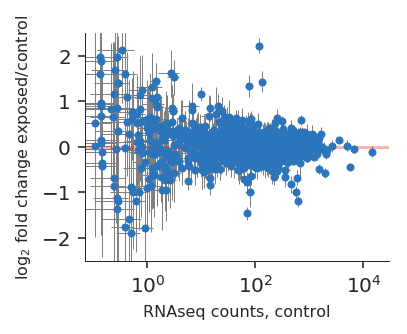

In [31]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(3, 2.4))

    ax.axhline(0, color='r', alpha=0.3)
    ax.errorbar(data_control_mean, log_fold_change, xerr=data_control_std, yerr=fold_change_std_rel,
                fmt='none', ecolor=[0.5, 0.5, 0.5], elinewidth=0.5)
    ax.semilogx(data_control_mean, log_fold_change, '.', color='#2D75BB')
    ax.set_xlim(0.07, 3e4)
    ax.set_ylim(-2.5, 2.5);

    ax.set_xlabel('RNAseq counts, control', fontsize=8)
    ax.set_ylabel('$\log_2$ fold change exposed/control',fontsize=8)
    
    ax.minorticks_off()
    
    for ax_name in ['left', 'bottom']:
        ax.spines[ax_name].set_linewidth(0.5)

    sns.despine()
    
    fig.tight_layout()

    fig.savefig('../figs/ibarra_soria_Fig5B_remake.pdf')